# Intro for programmers: python, anaconda, linear algebra, numpy, pandas

Python has been created by the Dutchman Guido van Rossum and the first release was in 1991. Tiobe index of August 2024 and Stack Overflow Developer Survey 2024:

<img src="tiobeIndexAug2024.png" alt="drawing" width="1200"/>
<img src="stackOverflowDeveloperSurvey2024.png" alt="drawing" width="600"/>

We will only use a small part of python. So be careful where you spend your time on when learning python. Besides plain python, we use the libraries Numpy, Pandas, Matplotlib, Seaborn (and also many others). This Jupyter Notebook contains about all python constructs that you need to learn about for the minor AI.

**Python tutorials**

* [DataCamp - normally paid, but we've got free access](https://learn.datacamp.com/courses). See Teams for more info. Use your Avans email account with '@student.avans.nl' to avoid running into a pay wall. 
* [w3schools](https://www.w3schools.com/python/default.asp)
* [Kaggle Learn](https://www.kaggle.com/learn/overview)

**Create an anaconda environment**

* install anaconda from [this link](https://www.anaconda.com/download)
* open an anaconda powershell or command prompt
* anaconda prompt> conda create -n py312 python=3.12 numpy matplotlib pandas seaborn jupyter notebook -c conda-forge
* anaconda prompt> conda activate py312
* anaconda prompt> jupyter notebook

Avoid working in the `base` environment. Alternative is the Anaconda graphical launcher, but is harder to control the environments.

**Python is an interpreted language**

Python statements are executed directly when read from a file. This means:
* Python can be run using an Anaconda command prompt. Let's try this.
* A function definition must appear in a python program before the function is used.
* You can re-execute a part of a program, e.g. a cell from a jupyter notebook. Variables created in earlier cells remain in memory. This is called REPL (Read, Evaluate, Print, Loop) and is VERY handy during development.
* Python is slow. Libraries like Pytorch run computationally intensive tasks in C++ and on the GPU.

**Python is design to be readable**

* No need to use semicolumns to end a statement, although you can do it.
* Relies on whitespace indentation to delimit blocks (e.g. for-loop, if-statement, function definition). Use 4 spaces, although any number of spaces will work, as long as you're consistent. Example:
```
for i in range(10):
    print(i)
```
* Single line comment: `# your comment`.
* Multi-line comment: `""" your multi-line comment """` or `''' your multi-line comment '''`. Handy to comment out a block of code.
* Document your code using `python docstring` (more info [here](https://realpython.com/documenting-python-code/)):
<img src="docstring.png" alt="drawing" width="800"/>

**Naming conventions**

The PyCharm IDE will highlight errors.
* Function or method: `my_function`
* Variable:	`my_variable`
* Class: `MyClass`
* Constant: `MY_CONSTANT`
* Module (a single Python file): `my_module.py`
* Package (a directory with Python modules; it contains an additional `__init__.py` file): `mypackage`

# Collection data types

There are four collection data types in the Python programming language:
* List is a collection which is ordered and changeable. Allows duplicate members.
* Tuple is a collection which is ordered and unchangeable. Allows duplicate members.
* Set is a collection which is unordered and unindexed. No duplicate members allowed.
* Dictionary is a collection which is unordered, changeable and indexed. No duplicate members allowed.

In [1]:
my_list = ["apple", "banana", 1]
my_tuple = ("apple", "banana", "cherry")
my_set = {"apple", "banana", "cherry"}
my_dictionary = {"brand": "Ford", "model": "Mustang", "year": 1964}

Note that we can mix the types of the values stored in a collection. Python is strongly, dynamically typed:
* Strongly typed: the type of a value can only change due to explicit conversion.
* Dynamically typed: type checking is only done at runtime (statically typed: type checking is done at compile time). 

If you're used to statically typed languages like Java or C#, a dynamically type language can be a source of errors. Examples:

In [2]:
# the type of a variable can change during its lifetime
thing = 3
print('thing:', thing)
print(type(thing))
thing = "apple"
print('thing:', thing)
print(type(thing))

# dynamically typed
if False:
     print(1 + "two")  # this line never runs, so no type error is raised
else:
     print(1 + 2)


# strongly typed: types are being checked and an error is thrown
import sys
try:
    print(1 + "two")
except TypeError:
    print(sys.exc_info())

thing: 3
<class 'int'>
thing: apple
<class 'str'>
3
(<class 'TypeError'>, TypeError("unsupported operand type(s) for +: 'int' and 'str'"), <traceback object at 0x000001F1EEE5A000>)


In [3]:
# iterate collections

# iterate list/tuple/set
for i in my_list:
    print(i)
    
# iterate dictionary
for key in my_dictionary:
    print(key)
    
for key in my_dictionary.keys():
    print(key)

for value in my_dictionary.values():
    print(value)
        
for key, value in my_dictionary.items():
    print(key, ' -> ', value)
    
# iterate list using a list comprehension, a more pythonic way of writing python
# [print(i) for i in my_list]

[item for pair in my_dictionary.items() for item in pair]

apple
banana
1
brand
model
year
brand
model
year
Ford
Mustang
1964
brand  ->  Ford
model  ->  Mustang
year  ->  1964


['brand', 'Ford', 'model', 'Mustang', 'year', 1964]

**YOU**: print the key/value pairs of a dictionary using a list comprehension

# Numpy

Numpy is a python library very useful for dealing with vectors and matrices in python.

![scalar-vector-matrix-tensor](https://hadrienj.github.io/assets/images/2.1/scalar-vector-matrix-tensor.png)

In [4]:
# scalar
z = 3
print('type(z):', type(z))

# vector
import numpy as np
y = np.array([10, 20])
print('y.shape:', y.shape)
print('type(y):', type(y))

# matrix of dimension 2 x 3 (#rows times #columns)
X = np.array([[4, 5, 6], [7, 8, 9]])
print('X.shape', X.shape)

type(z): <class 'int'>
y.shape: (2,)
type(y): <class 'numpy.ndarray'>
X.shape (2, 3)


**YOU**: create and print a matrix of dimension 4 x 10 containing zeros, using the np.zeros() method.

Vectors are often used in physics to represent a 2-D or 3-D position or velocity.

In data science, the training data is typically stored in a matrix. Each **row** is a **training sample** containing a number of **features**. So the **columns** are the features. This is an example:

![](https://www.cdn.geeksforgeeks.org/wp-content/uploads/creating_dataframe1.png)

In the code (not the image) above, our training data consists of 2 training samples each containing 3 features.

In supervised learning, the ML algorithm is trained by feeding it the training data and also the correct answers. The correct answers are typically called the **labels**.

Some naming conventions:
* the matrix with the training samples (without labels) is usually called `X`, upper case to denote that it's a matrix (pandas: matrix with training samples is usually called `df`, which is short for DataFrame)
* the number of training samples is usually called `m`
* the number of features is usually called `n`
* so the dimensions of X are `m x n`
* the vector with the labels (the correct answers) is usally called `y`, small caps to denote that it's a vector. Dimension is `m`.

**Tuples**

What about the trailing comma in the tuple `(2,)`?? It's to denote that it's a tuple:
* `3 * (2 + 1)`  # the number 2 (the parentheses are wrapping the expression `2 + 1`)
* `(2,)` # a 1-tuple holding a number 2

In all cases, except for the empty tuple, the comma makes it a tuple. Parentheses are only required when required for other syntactic reasons: to distinguish a tuple from a set of function arguments, operator precedence, or to allow line breaks.

For more than one item, it is no longer necessary since it is perfectly clear it is a tuple. However, the trailing comma is allowed to make defining them using multiple lines easier:
big_tuple = (
                   0,
                   1,
                   2,
                   3,
                   4,
                   5,
                   6,
                   7,
                   8,
                   9,
                   10,
               ).
Note that this applies to other collections (e.g. lists and dictionaries) too and not just tuples.

# Functions, vectorization and dot product

In [5]:
# definition of a function
def h(x):
    theta_0 = 0.7
    theta_1 = 2.2
    return theta_0 + theta_1 * x

# usage
x = 3
y = h(x)
print(f'y is {y}') # note the alternative (and preferred!) way of printing

y is 7.300000000000001


The function definition above only takes single values (scalars) as input. Let's modify the function to take a vector as input (and consequently also returns a vector as output.

In [6]:
 def h(x):
    theta_0 = 0.7
    theta_1 = 2.2
    hh = []
    for i in x:
        hh.append(theta_0 + theta_1 * i)
    return hh


**YOU**: make a graph of this function for range 0 to 9:
* use `import matplotlib.pyplot as plt` to get access to plotting method `plt.plot(x, y)`
* use `range(10)` to create a vector `x` of length 10 with the values 0 to 9
* create vector `y` using the function `h`
* use `plt.plot(x, y)` to create the graph
* use `plt.show()` to actually render

Let's change the function in a more pythonic way by using a list comprehension.

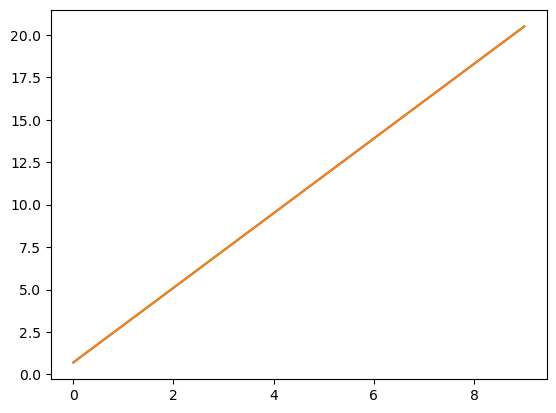

In [7]:
 def h(x):
    theta_0 = 0.7
    theta_1 = 2.2
    return [theta_0 + theta_1 * i for i in x]  # called a list comprehension (for-loop within a list)

import matplotlib.pyplot as plt
x = range(10)
y = h(x)
plt.plot(x,y)
plt.show

# usage
x = range(10)
y = h(x)  # y is also a vector!
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

Typically, a training sample has more features than just 1. So what is calculated for each training sample:
theta_0 + theta_1 * x_1 + theta_2 * x_2 + ...

**YOU**: take the function definition of `h(x)` from the beginning of this section (the one that can handle only 1 training sample with 1 feature), and change it to allow handling an **arbitrary** number of features:
* This means that input `x` becomes a vector with all the features of the training sample and `theta` also becomes a vector and is also input of the function. 
* Do `x` and `theta` have the same length? No, so a trick to remove this complication is to prepend `x` with a dummy feature x_0 which always has value 1. Now, `x` and `theta` have the same length and the calculation to perform becomes: theta_0 * x_0 + theta_1 * x_1 + theta_2 * x_2 + ... . 
* The python built-in function `zip()` can be used to simultaneously loop through `x` and `theta`, by returning tuples of the form `(theta_0, x_0)`.

Until now we've performed 2 modifications to our initial function. First we've changed it to allow handling multiple data samples. Then we started with the initial function and we've changed it to allow handling multiple features. This will of course become a function with two for-loops. We can try to do this with for-loops, but this will give ugly, complex code. Moreover, for-loops are very inefficient to run. So let's do it without for-loops! This is called **vectorization** and is a very important concept in python programming. We use the **dot product** matrix operator.
![](https://miro.medium.com/max/1716/1*-zwv5fz41tWLpUaY9SBQew.png)

The dot product of `X` and `theta`, so $X \cdot \Theta$, is exactly what we want:
<img src="dotProduct.png" alt="drawing" width="800"/>


So let's change the function definition as shown below:
* `X` is not a vector any more but a matrix with dimensions `m x n`.
* As we don't know the number of features, `theta` has become an argument of the function. `theta` is a vector of dimension `n`.
* We define `x_0` having always the value 1, then we don't need to treat `theta_0` in special way. The number of columns of `X` and the length of `theta` are now the same.

In [8]:
def h(X, theta):
    return X @ theta

X = np.array([[4, 5, 6], [2, 3, 4], [8, 9, 10], [7, 6, 3], [-1, -6, -3]])  # 5 training samples with each 3 features
print(f'shape of X is {X.shape}')
m = 5  # number of training samples
ones = np.ones((m, 1))  # matrix of shape (5,1) with only 1's
X = np.hstack((ones, X))  # adding the x_0 column, so shape will be (5,4)
print(f'shape of X is {X.shape}')

theta = np.array([0.7, 2.2, 5.1, 6.7])  # 3 features
print(f'shape of theta is {theta.shape}')
theta = theta[:, np.newaxis]  # from vector of length n to matrix of dimension n x 1 (not needed, for clarity)
print(f'shape of theta is {theta.shape}')

y = h(X, theta)
print(y)

shape of X is (5, 3)
shape of X is (5, 4)
shape of theta is (4,)
shape of theta is (4, 1)
[[ 75.2]
 [ 47.2]
 [131.2]
 [ 66.8]
 [-52.2]]


In [9]:
print(type(X))
print(type(theta))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


For a dot product the dimensions must fit. In `X @ theta`, the dimension should be `m x n` for `X` and `n x 1` for `theta`. The dimension of the result `y` will be `m x 1`.

Alternative ways of writing the dot product: `X.dot(theta)` or `np.dot(X, theta)`.

# Pandas

Pandas is a library for data manipulation in python. Very often the same task can be done in numpy as well as in pandas. It is a matter of programmer's preference which one to use. 

Pandas resembles Excel. The main data type is the **DataFrame**. A DataFrame is composed of three different components, the **index**, the **columns**, and the data. The data is also known as the values. 

![](https://www.cdn.geeksforgeeks.org/wp-content/uploads/creating_dataframe1.png)

Please use this [very good article](https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c) about pandas to learn about it.

In [10]:
import pandas as pd

df = pd.read_csv('trainingdata.csv', sep=',', header=None)
df.head()  # view first few rows of the data

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [11]:
X = df.iloc[:, 0:2]  # read the features (the first two columns) into X
y = df.iloc[:, 2]  # read the labels (the third column) into y
m = len(y)  # number of training samples

print(X.head())
print(y.head())

      0  1
0  2104  3
1  1600  3
2  2400  3
3  1416  2
4  3000  4
0    399900
1    329900
2    369000
3    232000
4    539900
Name: 2, dtype: int64


Python's slice notation:
* `a[start:stop]`  # items start through stop-1, so including start and excluding stop
* `a[start:]`      # items start through the rest of the array
* `a[:stop]`       # items from the beginning through stop-1
* `a[:]`           # a copy of the whole array
* `a[-3:-1]`       # items from the 4th item counting from the end until the item one before the end

In [12]:
# some examples
a = 'the minor AI is ...!!'
print(a[4:])
print(a[-3:-1])

minor AI is ...!!
.!


In [13]:
# pandas can be confusing
print(df.iloc[:, 0:2].head()) # exclusive! 0:2 are *indices*; normal python slicing
print(df.loc[:, 0:2].head()) # inclusive! 0:2 are *labels*

      0  1
0  2104  3
1  1600  3
2  2400  3
3  1416  2
4  3000  4
      0  1       2
0  2104  3  399900
1  1600  3  329900
2  2400  3  369000
3  1416  2  232000
4  3000  4  539900


# Miscellaneous

## convert vector to matrix

Assume `X` is a vector with 3 training samples with each 1 feature. Many numpy operations need matrices as parameter. So often we need to convert a vector of dimension `m` to a matrix of dimension `m x 1`.

In [14]:
X = np.array([1, 5, 7])
print('X.shape', X.shape)
X = X[:, np.newaxis]  # convert from shape (3,) to (3,1), so from vector to matrix
print('X.shape', X.shape)

X.shape (3,)
X.shape (3, 1)


## add a column to the front of a matrix

In earlier code, we've added a column x_0 to a matrix with always value 1 to allow usage of the dot product operator. A handy way to do this:

In [15]:
m = 3
ones = np.ones((m, 1))  # matrix of shape (3,1) with only 1's
X = np.hstack((ones, X))  # adding the x_0 column, so shape will be (3,2)
print('X.shape', X.shape)

X.shape (3, 2)


## flatten and reshape

You will see this often in examples, so better getting acquinted with it right a way. With `flatten()` you reduce the dimension of an ndarray to 1. With reshape you can restore it to its original dimensions.

In [16]:
a = np.array([[1,2], [3,4], [5,6]])  # dimension 3 x 2
print('a:', a)
print(a.shape)

b = a.flatten()
print('b:', b)
print(b.shape)

c = b.reshape(3, 2)
print('c:', c)
print(c.shape)

a: [[1 2]
 [3 4]
 [5 6]]
(3, 2)
b: [1 2 3 4 5 6]
(6,)
c: [[1 2]
 [3 4]
 [5 6]]
(3, 2)


# Python development

## Anaconda

Anaconda is a package and environment manager for python that is often used for data science projects. It can be found [here](https://www.anaconda.com/products/individual).

Installing a package:
* `conda install <package name>` for example `conda install tensorflow`

A conda virtual environment has a certain set of library versions. You can have multiple conda virtual environments each having its own set of library versions. Unfortunately, quite some probability that you'll bump into library compatibility issues during your Capstone project. The term 'library' is loosely defined in python. It can refer to modules or packages.

* view available virtual environments: `conda env list`
* create a new virtual environment: `conda create -n <myenv>`
* create a new virtual environment with a certain python version and numpy: `conda create -n <myenv> python=3.6 numpy`
* activate a virtual environment: `conda activate <myenv>`
* view packages and its versions: `conda list`

## Using pip with Anaconda

Sometimes a package you need is not available as conda distribution, then also `pip install <package name>` works. However this can easily lead to a messed-up virtual environment. The correct way of using pip with anaconda:
* always create a new environment, to not mess up the base environment: `conda create -n <myenv> python=<python version>`
* first try conda install: `conda install <your package>`
* if this doesn't work, try the conda forge channel: `conda install -c conda-forge <your package>`
* if this doesn't work, try pip in the following way:
  * `conda install pip`
  * `<location of anaconda>\\anaconda\\envs\\<your env>\\Scripts\\pip install <your package>` in order to be sure to use the correct pip binary
* how to check the location of pip:
  * `which pip` (linux)
  * `where pip` (windows cmd)
  * `Get-Command pip` (windows powershell)
 

## IDE: Visual Studio Code with Github Copilot or PyCharm

We will often use a Jupyter Notebook for our python code. You can also use an IDE like Visual Studio Code with Github Copilot or PyCharm.

If you use an IDE, you need to get it to use your conda environments, instead of having it create its own environments. More information can be found [here (Visual Studio)](https://code.visualstudio.com/docs/python/environments) and [here (PyCharm)](https://www.jetbrains.com/help/pycharm/conda-support-creating-conda-virtual-environment.html).

Free access to Github Copilot can be requested [here](https://docs.github.com/en/copilot/managing-copilot/managing-copilot-as-an-individual-subscriber/managing-your-copilot-subscription/getting-free-access-to-copilot-as-a-student-teacher-or-maintainer). [This video](https://www.youtube.com/watch?v=jXp5D5ZnxGM) gives an overview of the possibilities of Github Copilot.

Avans has an academic license for the Professional Edition of the PyCharm IDE. To use this academic license sign up with your @student.avans.nl email account. PyCharm can be downloaded [here](https://www.jetbrains.com/products/#type=ide).


## Virtualenv, Pipenv and miniconda

Conda and pip are so-called package managers. They're used to install packages.

Anaconda is also an environment manager that manages dependencies between packages. Other popular environment managers are virtualenv (quite old by now) and pipenv. Anaconda is often used for data science projects as it comes with a lot of packages used often for data science.

Anaconda comes with a lot of packages preinstalled, especially packages well-suited for data science. This is handy, but also big/slow. Miniconda is a stripped-down version of Anaconda.

## Some solutions to the questions.

brand  ->  Ford
model  ->  Mustang
year  ->  1964


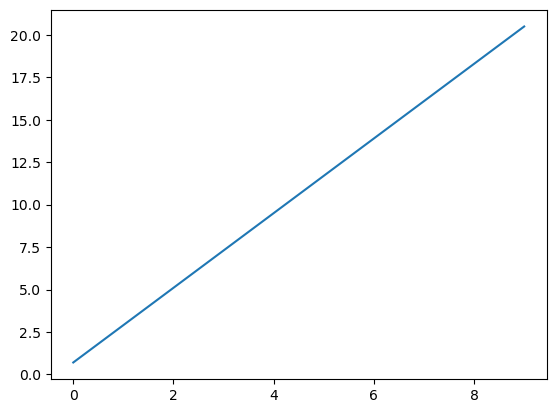

y: 39


In [17]:
# iterate of dictionary using a list comprehension; not that 'key, value' is actually a tuple being returned
my_dictionary = {"brand": "Ford", "model": "Mustang", "year": 1964}
[print(key, ' -> ', value) for key, value in my_dictionary.items()]


#  create matrix of dimension 4 x 10 containing zeros, using the np.zeros() method
mm = np.zeros((4, 10))  # note the double parentheses; this is because we pass a tuple to the np.zeros() method


# make a graph of this function for range 0 to 9
def h(x):
    theta_0 = 0.7
    theta_1 = 2.2
    hh = []
    for i in x:
        hh.append(theta_0 + theta_1 * i)
    return hh
#
import matplotlib.pyplot as plt
x = range(10)
y = h(x)
plt.plot(x, y)
plt.show()


# modify the function to handle 1 training sample with an aribitrary number of features
def h(x, theta):
    hh = 0
    for x_i, theta_i in zip(x, theta):
        hh += x_i * theta_i
    return hh
# usage
x = [3, 4, 5]  # 3 features
theta = [1, 2, 3, 4]  # 3 features
x.insert(0, 1)  # prepend 1 in order for x and theta to be the same length; you could also put this inside the function definition
y = h(x, theta)
print('y:', y)